# Figure 3I

In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from scipy.signal import savgol_filter

In [2]:
ki_5_3 = '../../data/eclip_overlaps/encode/ki_matching_5_250_i_75_e_3ss_overlaps/'
ki_3_5 = '../../data/eclip_overlaps/encode/ki_matching_3_250_i_75_e_5ss_overlaps/'

matching_5_3 = '../../data/eclip_overlaps/encode/matching_5_250_i_75_e_3ss_overlaps/'
matching_3_5 = '../../data/eclip_overlaps/encode/matching_3_250_i_75_e_5ss_overlaps/'

meta_2 = pd.read_csv(
    '../../data/eclip_overlaps/eclip_metadata.tsv',
    sep='\t',
    index_col = 0
)

In [3]:
def plot_density_5ss(target,uj_dir,ax,nam,num,ax_color,line_color):
    
    pos2 = [int(i) for i in np.linspace(-75,249,325)]
    
    meta_df = meta_2[meta_2['target'] == target]
    
    k562_samps = meta_df[meta_df['cell_line'] == 'K562'].index
    hep_samps = meta_df[meta_df['cell_line'] == 'HepG2'].index
    
    for i in k562_samps:
        filenam = uj_dir + i +'/peak_summary.txt'
        uj_df = pd.read_csv(
            filenam,
            sep='\t',
            header=None,
            index_col=0
        )

        ax.plot(
            pos2,
            savgol_filter(uj_df.iloc[0,:],11,3),
            c=line_color,
            linestyle='-',
            label=nam
        )
        
        ax.fill_between(
            pos2, 
            savgol_filter(uj_df.iloc[1,:],11,3), 
            savgol_filter(uj_df.iloc[2,:],11,3), 
            alpha=0.3,
            color=line_color
        )

    ax.axvline(
        0,
        linestyle='--', 
        c='k', 
    )
    
    ax.set_xlabel(
        'Relative Position', 
        fontsize=14
    )
    ax.set_ylabel(
        'Peak frequency', 
        fontsize=14
    )
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


    
def plot_density_3ss(target,uj_dir,ax,nam,num,ax_color,line_color):
    
    pos2 = [int(i) for i in np.linspace(-250,74,325)]
    
    meta_df = meta_2[meta_2['target'] == target]
    
    k562_samps = meta_df[meta_df['cell_line'] == 'K562'].index
    hep_samps = meta_df[meta_df['cell_line'] == 'HepG2'].index
    
    for i in hep_samps:
        filenam = uj_dir + i +'/peak_summary.txt'
        uj_df = pd.read_csv(
            filenam,
            sep='\t',
            header=None,
            index_col=0
        )

        ax.plot(
            pos2,
            savgol_filter(uj_df.iloc[0,:],11,3),
            c=line_color,
            linestyle='-',
            label=nam
        )
        
        ax.fill_between(
            pos2, 
            savgol_filter(uj_df.iloc[1,:],11,3), 
            savgol_filter(uj_df.iloc[2,:],11,3), 
            alpha=0.3,
            color=line_color
        )


    ax.axvline(
        0,
        linestyle='--', 
        c='k', 
    )
    
    ax.set_xlabel(
        'Relative Position', 
        fontsize=14
    )
    ax.set_ylabel(
        'Peak frequency', 
        fontsize=14
    )
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
    
def plot_comparison_3ss_2(target,num):
    fig, ax1 = plt.subplots(1,1, figsize=(4,3))

    plot_density_3ss(target, ki_5_3, ax=ax1, nam='known intron',num=num,ax_color='k',line_color='tab:grey')

    plot_density_3ss(target, matching_5_3, ax=ax1, nam='DHX15',num=num,ax_color='k',line_color='tab:red')

    ax1.set_xlabel("3' splice site")
    
    ax1.set_ylabel('Binding Frequency')
    plt.legend()

    
def plot_comparison_5ss_2(target,num):
    fig, ax1 = plt.subplots(1,1, figsize=(4,3))

    plot_density_5ss(target, ki_3_5, ax=ax1, nam='known intron',num=num,ax_color='k',line_color='tab:grey')

    plot_density_5ss(target, matching_3_5, ax=ax1, nam='DHX15',num=num,ax_color='k',line_color='tab:red')

    ax1.set_xlabel("5' splice site")
    
    ax1.set_ylabel('Binding Frequency')
    plt.legend()



Text(0.5, 0.94, 'PRPF8')

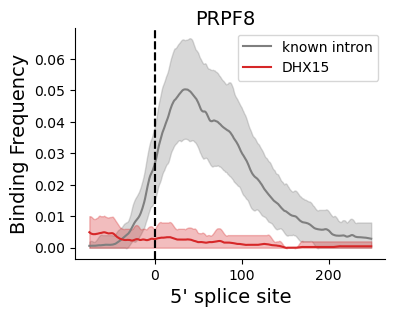

In [4]:
plot_comparison_5ss_2('PRPF8-human',500)
plt.suptitle('PRPF8',fontsize=14,y=0.94)

Text(0.5, 0.94, 'SF3B4')

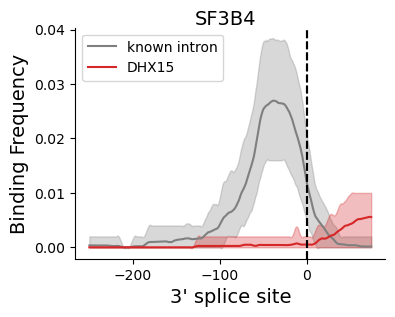

In [5]:
plot_comparison_3ss_2('SF3B4-human',500)
plt.suptitle('SF3B4',fontsize=14,y=0.94)

Text(0.5, 0.94, 'U2AF2')

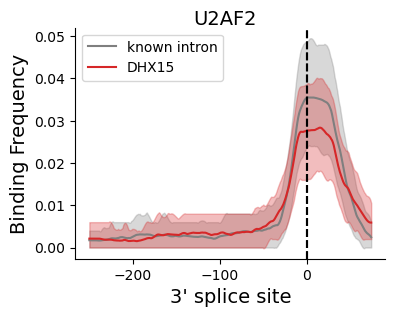

In [6]:
plot_comparison_3ss_2('U2AF2-human',500)
plt.suptitle('U2AF2',fontsize=14,y=0.94)

Text(0.5, 0.94, 'U2AF1')

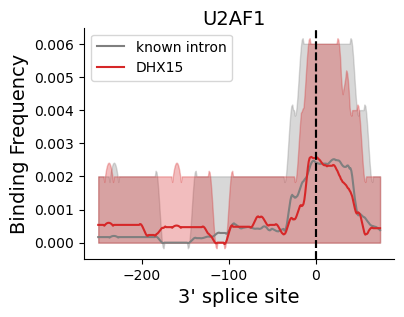

In [7]:
plot_comparison_3ss_2('U2AF1-human',500)
plt.suptitle('U2AF1',fontsize=14,y=0.94)

# Figure 3K

In [8]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyranges

from natsort import os_sorted


In [9]:
filelist = os_sorted(glob.glob('../../data/eclip_overlaps/ip_peaks_exp_genes/*IDR.txt'))
filelist

['../../data/eclip_overlaps/ip_peaks_exp_genes/SF3B4_K562_IDR.txt',
 '../../data/eclip_overlaps/ip_peaks_exp_genes/U2AF2_K562_IDR.txt']

In [10]:
sf3b4_test = pd.read_csv(filelist[0],sep='\t',header=None)
u2af2_test = pd.read_csv(filelist[1],sep='\t',header=None)


In [11]:
sf3b4_filt = sf3b4_test.iloc[:,[0,1,2,5]]
sf3b4_filt.columns = ['Chromosome','Start','End','Strand']

u2af2_filt = u2af2_test.iloc[:,[0,1,2,5]]
u2af2_filt.columns = ['Chromosome','Start','End','Strand']

In [12]:
sf3b4_range = pyranges.PyRanges(sf3b4_filt)
u2af2_range = pyranges.PyRanges(u2af2_filt)


In [13]:
def shift_ranges(df,num):
    tmp = df
    tmp.loc[
        tmp['Strand']=='-',
        ['Start','End']
    ]-=num
    tmp.loc[
        tmp['Strand']=='+',
        ['Start','End']
    ]+=num
    
    return tmp

In [14]:
overlaps_1 = []

for i in range(0,50):
    sf3b4_filt = sf3b4_test.iloc[:,[0,1,2,5]]
    sf3b4_filt.columns = ['Chromosome','Start','End','Strand']

    sf3b4_tmp = pyranges.PyRanges(shift_ranges(sf3b4_filt,i))
    overlaps_1.append(len(sf3b4_tmp.overlap(u2af2_range)))


In [15]:
meta = pd.read_csv('../../data/dtag_experiments/sum159_all_meta.tsv',sep='\t')

In [16]:
meta_filt = meta.loc[
    (meta['Cell line'] == 'SUM159') &
    (meta['Target'] == 'DHX15') &
    (meta['Clone'] == 'D12') &
    (meta['Time value'] == 9) &
    (
        (meta['Dosage value'] == 0) |
        (meta['Dosage value'] == 500)
    )
]


In [17]:
def get_sj(meta_df):
    filelist = []
    for i,row in meta_df.iterrows():
        filepath = '../../data/dtag_experiments/' + \
            row['Target'] + \
            '/sj_out/'+ \
            row['Sample basename']
        filelist.append(glob.glob(filepath+'*')[0])
    return filelist


def get_ki_coords(filenam):
    test = pd.read_csv(filenam,sep='\t',dtype='object')
    test['unique'] = test['unique'].astype(float)
    test_filt = test[
        (test['unique'] >= 3) \
        & (test['class'] == 'known intron')
    ]
    test_filt.loc[
        test_filt['strand']== '+',
        'start'
    ] = test_filt['end']
    test_filt.loc[
        test_filt['strand']== '-',
        'end'
    ] = test_filt['start']
    return test_filt

def get_matching_5_coords(filenam):
    test = pd.read_csv(filenam,sep='\t',dtype='object')
    test['unique'] = test['unique'].astype(float)
    test_filt = test[
        (test['unique'] >= 3) \
        & (test['class'] == 'matching 5')
    ]
    test_filt.loc[
        test_filt['strand']== '+',
        'start'
    ] = test_filt['end']
    test_filt.loc[
        test_filt['strand']== '-',
        'end'
    ] = test_filt['start']
    return test_filt

In [18]:
meta_filt['filepath'] = get_sj(meta_filt)

/storage/westbrook/tmp/ipykernel_18198/2471691036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_filt['filepath'] = get_sj(meta_filt)


In [19]:
ki_coords = [get_ki_coords(i) for i in meta_filt['filepath']]
match_5_coords = [get_matching_5_coords(i) for i in meta_filt['filepath']]

In [20]:
ki_ranges = []
for tab in ki_coords:
    tab_filt = tab.iloc[:,0:4]
    tab_filt.columns = ['Chromosome','Start','End','Strand']
    ki_ranges.append(pyranges.PyRanges(tab_filt))
    
match_5_ranges = []
for tab in match_5_coords:
    tab_filt = tab.iloc[:,0:4]
    tab_filt.columns = ['Chromosome','Start','End','Strand']
    match_5_ranges.append(pyranges.PyRanges(tab_filt))

In [21]:
sf3b4_filt = sf3b4_test.iloc[:,[0,1,2,5]]
sf3b4_filt.columns = ['Chromosome','Start','End','Strand']

sf3b4_shift = pyranges.PyRanges(shift_ranges(sf3b4_filt,np.argmax(overlaps_1)))

In [22]:
def jxn_overlap_1(ip_range,ki_range):
    
    overlap_range = ip_range.overlap(ki_range)
    test = pd.merge(ip_range.df,overlap_range.df, how='outer', indicator=True)
    non_overlap_range = pyranges.PyRanges(test.loc[
        test['_merge'] == 'left_only',
        ['Chromosome','Start','End','Strand']
    ])
    return len(overlap_range)/len(ip_range)    
    

def jxn_overlap_1_counter(ip_range,ki_range):
    
    overlap_range = ip_range.overlap(ki_range)
    test = pd.merge(ip_range.df,overlap_range.df, how='outer', indicator=True)
    non_overlap_range = pyranges.PyRanges(test.loc[
        test['_merge'] == 'left_only',
        ['Chromosome','Start','End']
    ])
    return str(len(overlap_range))    

def jxn_overlap_2(ip_range,ki_range,match_5_range):    
    overlap_range = ip_range.overlap(ki_range)
    test = pd.merge(ip_range.df,overlap_range.df, how='outer', indicator=True)
    non_overlap_range = pyranges.PyRanges(test.loc[
        test['_merge'] == 'left_only',
        ['Chromosome','Start','End','Strand']
    ])
    return len(non_overlap_range.overlap(match_5_range))/len(non_overlap_range)

Text(50.097222222222214, 0.5, "Fraction peaks overlapping canonical 3'ss")

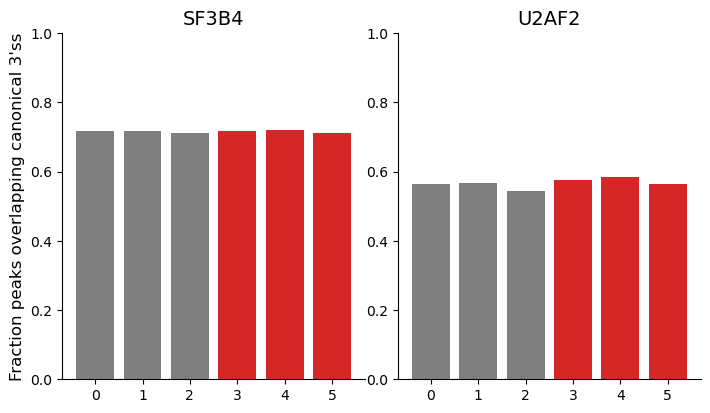

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,4))

bp1 = ax1.bar(
    range(6),
    [jxn_overlap_1(sf3b4_shift,i) for i in ki_ranges],
    color=['tab:grey']*3 + ['tab:red']*3
)

bp2 = ax2.bar(
    range(6),
    [jxn_overlap_1(u2af2_range,i) for i in ki_ranges],
    color=['tab:grey']*3 + ['tab:red']*3
)

plt.tight_layout(w_pad=0.1)

for ax in [ax1,ax2]:
    ax.set_ylim([0,1])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
ax1.set_title('SF3B4', fontsize=14)
ax2.set_title('U2AF2', fontsize=14)

ax1.set_ylabel("Fraction peaks overlapping canonical 3'ss", fontsize=12)

# Figure 3L

Text(32.347222222222214, 0.5, "peaks overlapping cryptic 3'ss/ \n peaks not overlapping canonical 3'ss")

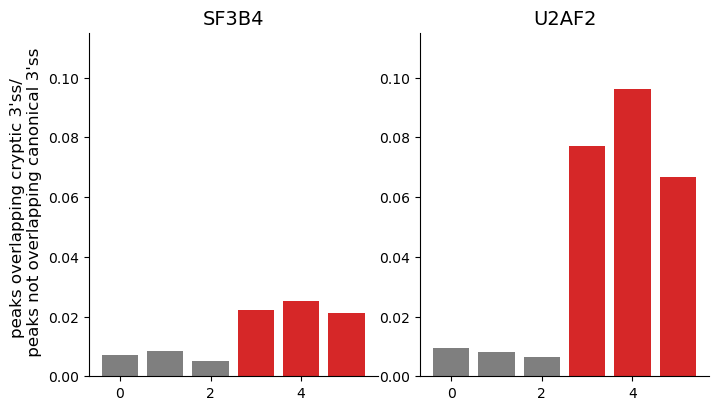

In [24]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,4))

bp1 = ax1.bar(
    range(6),
    [jxn_overlap_2(sf3b4_shift,i,j) for i,j in zip(ki_ranges,match_5_ranges)],
    color=['tab:grey']*3 + ['tab:red']*3
)

bp2 = ax2.bar(
    range(6),
    [jxn_overlap_2(u2af2_range,i,j) for i,j in zip(ki_ranges,match_5_ranges)],
    color=['tab:grey']*3 + ['tab:red']*3
)

plt.tight_layout(w_pad=0.1)

for ax in [ax1,ax2]:
    ax.set_ylim([0,0.115])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

ax1.set_title('SF3B4', fontsize=14)
ax2.set_title('U2AF2', fontsize=14)

ax1.set_ylabel("peaks overlapping cryptic 3'ss/ \n peaks not overlapping canonical 3'ss", fontsize=12)

# Figure 3M

In [25]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from scipy.signal import savgol_filter

In [26]:
ki_5_3 = '../../data/eclip_overlaps/sum159/ki_matching_5_250_i_75_e_3ss_overlaps/'

matching_5_3 = '../../data/eclip_overlaps/sum159/matching_5_250_i_75_e_3ss_overlaps/'


In [27]:
def plot_density_3ss(target,uj_dir,ax,nam,num,ax_color,line_color):
    
    pos2 = [int(i) for i in np.linspace(-250,74,325)]
    
    
    filenam = uj_dir + target +'/peak_summary.txt'
    uj_df = pd.read_csv(
        filenam,
        sep='\t',
        header=None,
        index_col=0
    )

    ax.plot(
        pos2,
        savgol_filter(uj_df.iloc[0,:],11,3),
        c=line_color,
        alpha=0.8,
        linestyle='-',
        label=nam
    )

    ax.fill_between(
        pos2, 
        savgol_filter(uj_df.iloc[1,:],11,3), 
        savgol_filter(uj_df.iloc[2,:],11,3), 
        alpha=0.3,
        color=line_color
    )

    ax.axvline(
        0,
        linestyle='--', 
        c='k', 
    )
    
    ax.set_xlabel(
        'Relative Position', 
        fontsize=14
    )
    ax.set_ylabel(
        'Peak frequency', 
        fontsize=14
    )
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

def plot_comparison_3ss_2(target,num):
    fig, ax1 = plt.subplots(1,1, figsize=(4,3))

    plot_density_3ss(target, ki_5_3, ax=ax1, nam='canonical ss',num=num,ax_color='k',line_color='tab:grey')

    plot_density_3ss(target, matching_5_3, ax=ax1, nam='cryptic ss',num=num,ax_color='k',line_color='tab:red')

    ax1.set_xlabel("3' splice site")
    
    ax1.set_ylabel('Binding Frequency')
    plt.legend()
    plt.title(target, fontsize=12)



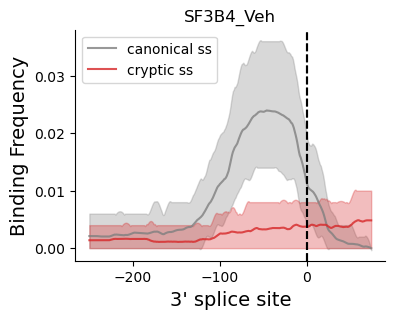

In [28]:
plot_comparison_3ss_2('SF3B4_Veh',500)

# Figure 3N

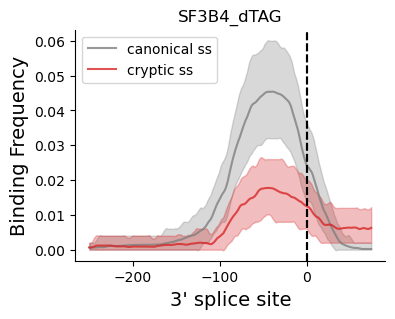

In [29]:
plot_comparison_3ss_2('SF3B4_dTAG',500)